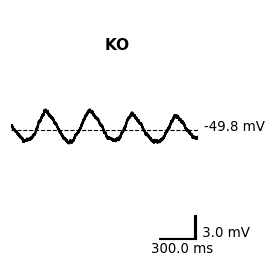

In [1]:
# Haley Speed (haley.e.speed@gmail.com), Center for Integrated Brain Research, Seattle Children's Research Institute
# If the axes plot weird, make sure all data in the column is numeric (no '--' denoting missing data, etc)


# Import packages
import matplotlib.pyplot as plt  #For plotting/graphing
import pandas as pd              # For working with spreadsheets
import os                        # For working with files and directories 
import csv                       # For working with spreadsheets
import datetime                  # For timestamping your work
import numpy as np               # For math functions
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar  # Package for scale bars

# Input File variables
dir_in = 'D:\Dropbox\Code\Python\Matplotlib'
file_osc_traces = 'osc_traces.csv'            # Data to plot raw traces for oscillating neurons

x_column_name = 'Time'
y_column_name = 'KO'
group_name = 'KO'
vm = -49.8                                    # y-value for the horizontal reference line 

x_min = 0 
x_max = 1500
y_min = -65
y_max = y_min + 30

line_color = 'black'
line_style = '-'
line_width = 2

title_distance = 10 
x_tick_length = (x_max-x_min)/5
y_tick_length=(y_max-y_min)/10
x_tick_units = 'ms'
y_tick_units = 'mV'


y_hline = vm
y_hline_marker = '--'
y_hline_color = 'black'
y_hline_width = 1
y_hline_start = 0
y_hline_end = 250

plot_dpi = 80
save_dpi = 300
save_name = 'KO Oscillation Trace'
save_type = '.jpg'                              # Can also save as .PNG or .pdf
  

#-------------------------------------------- Does not change between runs -----------------------------------------#

# Directory functions
os.chdir(dir_in)                            # Change the current directory to the one with all of your csv files
now = datetime.datetime.now()               # Gets the current date and time
date_string = now.strftime('%y%m%d %H.%M')  # formats the current date and time
dir_out = dir_in + '\\' + date_string       # Creates a timestamped name for a new folder for your output files

# Load csv worksheets into pandas dataframes (df). 1 Worksheet = 1 dataframe
df_osc_traces = pd.read_csv (file_osc_traces)

# Assign data to x and y variables
x_data = df_osc_traces[x_column_name]
y_data = df_osc_traces[y_column_name]


# Generate the Figure and layer1 (ax1)
fig, ax = plt.subplots(figsize=(3, 4), dpi=plot_dpi) # subplots rather than plt will be used to fine-tune the output


# Plot the data
ax.plot(x_data, y_data, line_style, lw = line_width, color = line_color, label = group_name) 

# Add a horizontal line
ax.axhline(y_hline, y_hline_start, y_hline_end , color = y_hline_color, lw = y_hline_width, linestyle = y_hline_marker) 
y_hline_label = str(y_hline) + ' mV'
ax.text(x_max+50, y_hline, y_hline_label, size = 12, color = line_color)

# Set axes limits [xmin, xmax, ymin, ymax]
ax.axis ([x_min, x_max, y_min, y_max]) 

# Set tick lengths
ax.xaxis.set_ticks(np.arange(x_min, x_max, x_tick_length))
ax.yaxis.set_ticks(np.arange(y_min, y_max, y_tick_length))

# Remove bounding lines 
ax.spines['top'].set_visible (False)
ax.spines['right'].set_visible (False)
ax.spines['left'].set_visible (False)
ax.spines['bottom'].set_visible (False)

# Remove ticks and labels
ax.yaxis.set_ticks([])
ax.yaxis.set_ticklabels([])
ax.xaxis.set_ticks([])
ax.xaxis.set_ticklabels([])

# Create scale bar
x_label = str(x_tick_length) + ' ' + x_tick_units
y_label = ' ' + str(y_tick_length) + ' ' + y_tick_units

x_scalebar = AnchoredSizeBar(ax.transData, x_tick_length, '', 'lower right', 
                             pad=0, color='black', frameon=False, size_vertical= 0.2)
y_scalebar = AnchoredSizeBar(ax.transData, 20, '', 'lower right', 
                              pad=0, color='black', frameon=False, size_vertical= y_tick_length)
ax.add_artist(x_scalebar)
ax.add_artist(y_scalebar)

# Add scale and units to scale bars
ax.text(x_max - x_max/4, y_min, x_label, size = 12, color = line_color)
ax.text(x_max , y_min + 2 , y_label, size = 12, color = line_color)

# Add a title
ax.text(x_max/2, y_hline + title_distance, group_name, size = 14, color = 'black', fontweight = 'bold')

plt.show()

# Saves data to a new subfolder
save_fig = save_name + save_type
try:
    os.stat(dir_out)
except:
    os.mkdir(dir_out)
# Write data to file
os.chdir(dir_out)
fig.savefig(save_fig, dpi=save_dpi, facecolor='w', edgecolor='w',
    orientation='portrait', papertype=None, format=None,
    transparent=False, bbox_inches='tight', pad_inches=0.1,
    frameon=None, metadata=None)
os.chdir(dir_in)

